In [1]:
include("../src/vafdyn.jl")
using .VAFDyn

In [2]:
using LaTeXStrings
using Plots
gr()

Plots.GRBackend()

In [58]:
params1 = Dict(
    "N"=>500,
    "ρ"=>2.,
    "ϕ"=>2.,
    "μ"=>1.0
)

params2 = Dict(
    "N"=>500,
    "ρ"=>2.,
    "ϕ"=>2.,
    "μ"=>5.0
)

params3 = Dict(
    "N"=>500,
    "ρ"=>2.,
    "ϕ"=>2.,
    "μ"=>20.0
)

paramSets_pars = [params1, params2, params3]

evolveTime = 100

100

In [59]:
sols_set = []

@time for params in paramSets_pars
    dfs = VAFDyn.DFreqspace(params["N"])
    VAFDyn.evolveVAF(dfs, params, 100)
    nEq_f = ((2params["ρ"]+params["ϕ"])/params["ρ"])params["μ"] ./ dfs.freqs_f[2:end-1];
    set = Dict(
        "dfs"=>dfs,
        "params"=>params,
        "nEq_f"=>nEq_f
    )
    push!(sols_set, set)
end

  0.716335 seconds (208.33 k allocations: 25.295 MiB)


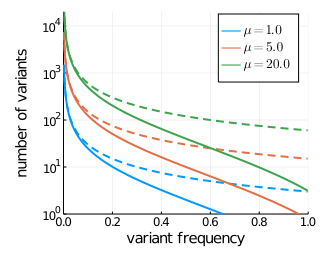

In [67]:
dfs = sols_set[1]["dfs"]
params = sols_set[1]["params"]
nEq_f = sols_set[1]["nEq_f"]


h = plot(dfs.freqs_f[2:end-1], nEq_f,
    yaxis=:log10,
    label="",
    linewidth=2,
    size=(320,260),
    linestyle=:dash,
    legendfontsize=9,
    labelfontsize=10,
    color=1)
plot!(dfs.freqs_f[2:end-1], dfs.n_f[2:end-1],
    label=latexstring("\\mu="*string(params["μ"])),
    color=1,
    linewidth=2)

for (i, set) in enumerate(sols_set[2:end])
    dfs = set["dfs"]
    params = set["params"]
    nEq_f = set["nEq_f"]
    plot!(dfs.freqs_f[2:end-1], nEq_f,
        label="",
        linewidth=2,
        linestyle=:dash,
        color=i+1)
    plot!(dfs.freqs_f[2:end-1], dfs.n_f[2:end-1],
        label=latexstring("\\mu="*string(params["μ"])),
        color=i+1,
        linewidth=2)
end
xlims!((0, 1))
ylims!((10^0, 2*10^4))
xlabel!("variant frequency")
ylabel!("number of variants")
display(h)

savefig(h, "../figures/VAFmutRateEffect.pdf")